<h1 style='color:#F60000'> EDA on Social_Network_Ads

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data_socialnetwork_ads=pd.read_csv('Social_Network_Ads.csv')
data_socialnetwork_ads.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [13]:
data_socialnetwork_ads.info(verbose =True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              414 non-null    int64
 1   EstimatedSalary  414 non-null    int64
 2   Purchased        414 non-null    int64
dtypes: int64(3)
memory usage: 9.8 KB


In [14]:
data_socialnetwork_ads.describe( include="all")  # include='all' , includes categorical values also

,Age,EstimatedSalary,Purchased
count,414.00000,414.000000,414.000000
mean,37.10628,68760.869565,0.364734
std,11.49706,34876.236597,0.481938
min,0.00000,0.000000,0.000000
25%,29.00000,43000.000000,0.000000
50%,37.00000,69500.000000,0.000000
75%,46.00000,87000.000000,1.000000
max,60.00000,150000.000000,1.000000


In [15]:
data_socialnetwork_ads.describe( include="all").T  # .T   --to transpose dataset

,count,mean,std,min,25%,50%,75%,max
Age,414.0,37.106280,11.497060,0.0,29.0,37.0,46.0,60.0
EstimatedSalary,414.0,68760.869565,34876.236597,0.0,43000.0,69500.0,87000.0,150000.0
Purchased,414.0,0.364734,0.481938,0.0,0.0,0.0,1.0,1.0


    Age
    EstimatedSalary
    cant be zero, lets check if there any

In [16]:
data_socialnetwork_ads.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [17]:
#repalce 0 with nan, so it would be easy to work

data_socialnetwork_ads_copy = data_socialnetwork_ads.copy(deep = True) 
# replacing the 0 values with Nan

data_socialnetwork_ads_copy[['Age','EstimatedSalary']]=data_socialnetwork_ads_copy[['Age','EstimatedSalary']].replace(0,np.NaN)

## count Nans
data_socialnetwork_ads_copy.isnull().sum()

Age                7
EstimatedSalary    7
Purchased          0
dtype: int64

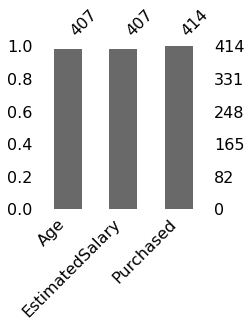

In [18]:
## null count analysis
import missingno as msno
p=msno.bar(data_socialnetwork_ads_copy,figsize=(3,3))

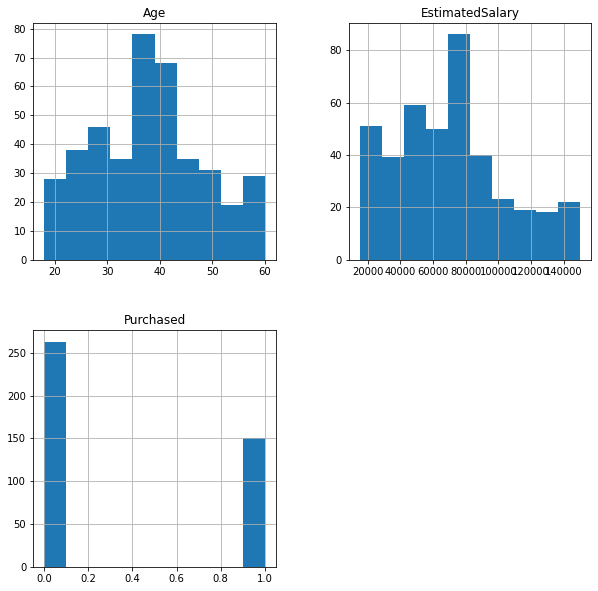

In [19]:
p=data_socialnetwork_ads_copy.hist(figsize = (10,10))

In [21]:
data_socialnetwork_ads_copy['Age'].fillna(data_socialnetwork_ads_copy['Age'].mean(), inplace = True)
data_socialnetwork_ads_copy['EstimatedSalary'].fillna(data_socialnetwork_ads_copy['EstimatedSalary'].mean(), inplace = True)

In [22]:
data_socialnetwork_ads_copy.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

lookks fine now

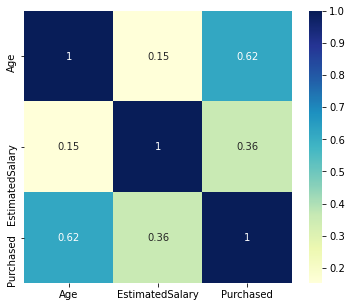

In [24]:
#The value of Pearson's Correlation Coefficient can be between -1 to +1. 
#1 means that they are highly correlated and 0 means no correlation.

plt.figure(figsize=(6,5)) 
p=sns.heatmap(data_socialnetwork_ads_copy.corr(), annot=True,cmap ='YlGnBu')

<h1 style='color:#F60000'> Scaling the data

In [26]:
X = data_socialnetwork_ads_copy.drop("Purchased",axis = 1)
y = data_socialnetwork_ads_copy.Purchased
X.head()

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0


In [27]:
# scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =  pd.DataFrame(sc.fit_transform(X))

In [28]:
X.head() #see the scalled data

,0,1
0,-1.802168,-1.514074
1,-0.263864,-1.484353
2,-1.129160,-0.800778
3,-1.033016,-0.384689
4,-1.802168,0.180003


In [29]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [30]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [31]:
print(train_scores)
print(test_scores)

[0.9927536231884058, 0.9311594202898551, 0.9311594202898551, 0.9311594202898551, 0.9202898550724637, 0.9239130434782609, 0.9130434782608695, 0.9130434782608695, 0.9094202898550725, 0.9094202898550725, 0.9057971014492754, 0.9057971014492754, 0.9021739130434783, 0.9057971014492754]
[0.8043478260869565, 0.8043478260869565, 0.8695652173913043, 0.8695652173913043, 0.8768115942028986, 0.8695652173913043, 0.8840579710144928, 0.8695652173913043, 0.8840579710144928, 0.8768115942028986, 0.8913043478260869, 0.8768115942028986, 0.8768115942028986, 0.8840579710144928]


<h1 style='color:#F60000'>Result Visualisation

c:\users\hari\datascience_venvs\venv_ml_projects\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\hari\datascience_venvs\venv_ml_projects\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


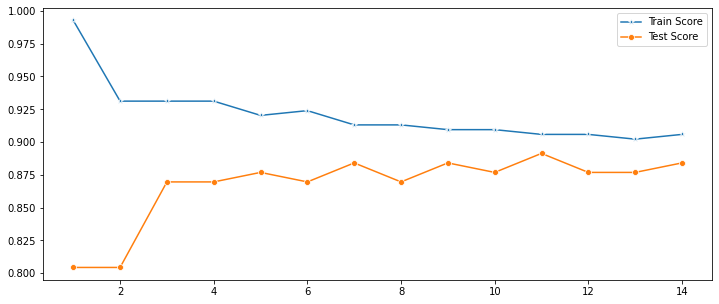

In [32]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [33]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 99.27536231884058 % and k = [1]


In [34]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 89.13043478260869 % and k = [11]


In [35]:
# use k=11
#Setup a knn classifier with k=11 neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8913043478260869

<h1 style='color:#F60000'> confusion matrix-reference</h1>
https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327

In [37]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,82,6,88
1,9,41,50
All,91,47,138


Text(0.5, 15.0, 'Predicted label')

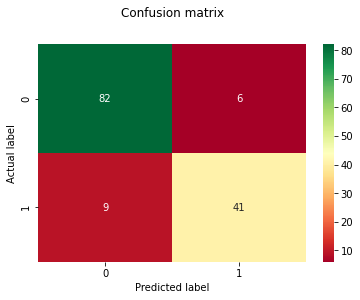

In [39]:
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdYlGn" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h1 style='color:#F60000'> Analize Classification 

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        88
           1       0.87      0.82      0.85        50

    accuracy                           0.89       138
   macro avg       0.89      0.88      0.88       138
weighted avg       0.89      0.89      0.89       138



In [41]:
#ROC
y_pred_proba = knn.predict_proba(X_test)[:,1]
y_pred_proba

array([0.        , 0.90909091, 1.        , 0.09090909, 0.90909091,
       0.09090909, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.90909091, 0.09090909,
       0.        , 1.        , 0.90909091, 0.        , 0.        ,
       1.        , 0.09090909, 0.        , 0.        , 0.        ,
       0.        , 0.81818182, 0.18181818, 0.81818182, 0.        ,
       0.        , 0.81818182, 0.        , 0.        , 0.        ,
       0.09090909, 0.54545455, 0.81818182, 0.        , 0.        ,
       0.        , 0.        , 0.36363636, 0.09090909, 0.90909091,
       0.63636364, 0.18181818, 0.        , 0.90909091, 0.18181818,
       0.        , 0.90909091, 0.90909091, 0.        , 0.54545455,
       0.90909091, 0.        , 0.        , 0.        , 0.72727273,
       0.63636364, 0.72727273, 0.09090909, 0.45454545, 0.        ,
       0.81818182, 0.09090909, 0.        , 1.        , 0.        ,
       0.        , 0.90909091, 0.        , 0.        , 0.     

In [42]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
print('FPR')
print(fpr)
print('TPR')
print(tpr)
print('Thresholds')
print(thresholds)

FPR
[0.         0.01136364 0.02272727 0.04545455 0.04545455 0.05681818
 0.06818182 0.07954545 0.07954545 0.09090909 0.13636364 0.30681818
 1.        ]
TPR
[0.   0.1  0.52 0.62 0.74 0.76 0.82 0.84 0.88 0.88 0.9  0.96 1.  ]
Thresholds
[2.         1.         0.90909091 0.81818182 0.72727273 0.63636364
 0.54545455 0.45454545 0.36363636 0.27272727 0.18181818 0.09090909
 0.        ]


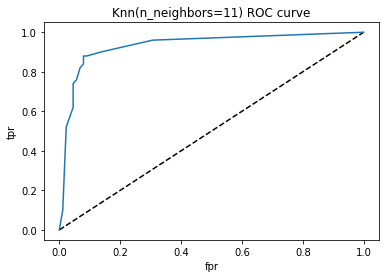

In [43]:
# Plotting the ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [44]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9322727272727271

<h1 style='color:#F60000'> Hyper Parameter optimization

In [45]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors

param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8985013223626211
Best Parameters: {'n_neighbors': 12}


In [47]:

#Setup a knn classifier with k=12 neighbors
knn = KNeighborsClassifier(12)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8768115942028986